# simple RNN (many-to-one 문제)
- 사인 파형 시계열을 입력으로 받아 다음 스탭의 출력을 예측
- 3개의 순서열을 입력한 후 출력값이 타겟과 일치하게 만듦

- 데이터 준비

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
s=np.sin(np.arange(21) * np.pi/4) #pi/4 = 45도
s
# 2 * pi = 360도

array([ 0.00000000e+00,  7.07106781e-01,  1.00000000e+00,  7.07106781e-01,
        1.22464680e-16, -7.07106781e-01, -1.00000000e+00, -7.07106781e-01,
       -2.44929360e-16,  7.07106781e-01,  1.00000000e+00,  7.07106781e-01,
        3.67394040e-16, -7.07106781e-01, -1.00000000e+00, -7.07106781e-01,
       -4.89858720e-16,  7.07106781e-01,  1.00000000e+00,  7.07106781e-01,
        6.12323400e-16])

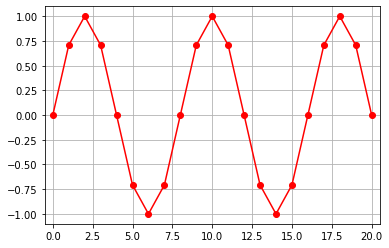

In [3]:
plt.plot(s,'ro-')
plt.xlim(-0.5,20.5),plt.grid()
plt.show()

- X_train, y_train 데이터 생성

In [4]:
X_train=[]
y_train=np.empty(len(s) - 3)
#처음 3개 다음부터가 y값. 시계열이니까. 그래서 전체 길이 -3
for i in range(len(s)-3):
    X_train.append(s[i:i+3])
    y_train[i] = s[i+3]
y_train

array([ 7.07106781e-01,  1.22464680e-16, -7.07106781e-01, -1.00000000e+00,
       -7.07106781e-01, -2.44929360e-16,  7.07106781e-01,  1.00000000e+00,
        7.07106781e-01,  3.67394040e-16, -7.07106781e-01, -1.00000000e+00,
       -7.07106781e-01, -4.89858720e-16,  7.07106781e-01,  1.00000000e+00,
        7.07106781e-01,  6.12323400e-16])

In [5]:
np.array(X_train).shape

(18, 3)

In [6]:
# 입력 데이터 개수, timesteps, input dim(정확힌 node?)

X_train=np.array(X_train).reshape(-1,3,1)
X_train.shape

(18, 3, 1)

In [7]:
X_train[0],y_train[0]

(array([[0.        ],
        [0.70710678],
        [1.        ]]), 0.7071067811865476)

In [8]:
X_train[1],y_train[1]

(array([[0.70710678],
        [1.        ],
        [0.70710678]]), 1.2246467991473532e-16)

- 순환 신경망 모델 정의/설정

In [9]:
import tensorflow as tf
seed=2022
np.random.seed(seed)
tf.random.set_seed(seed)

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

In [11]:
model= Sequential([
                   SimpleRNN(10,input_shape=X_train.shape[1:], activation='tanh'),
                   Dense(1,activation='linear')        
])
model.summary()
#120 = input dim(=1) * 10  + 10 * 10(노드끼리의 연결) + 10(각 노드의 바이어스)
# = (1+10) x 10 + 10

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 10)                120       
                                                                 
 dense (Dense)               (None, 1)                 11        
                                                                 
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.compile('adam',loss='mse')

- 모델 학습 전

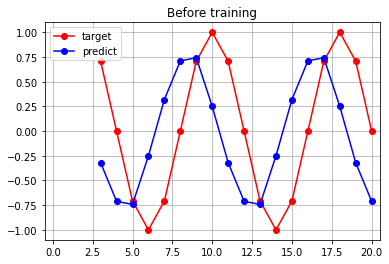

In [13]:
plt.plot(np.arange(3,21),y_train, 'ro-',label='target')
plt.plot(np.arange(3,21),model.predict(X_train),'bo-',label='predict')
plt.xlim(-0.5,20.5),plt.grid()
plt.legend(),plt.title('Before training')
plt.show()

- 모델 학습

In [14]:
hist=model.fit(X_train,y_train, epochs=100,verbose=0)

모델 학습 후

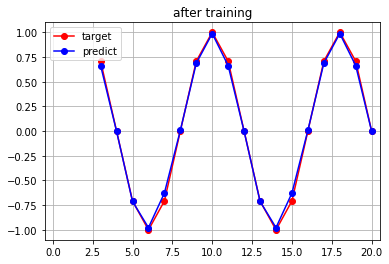

In [15]:
plt.plot(np.arange(3,21),y_train, 'ro-',label='target')
plt.plot(np.arange(3,21),model.predict(X_train),'bo-',label='predict')
plt.xlim(-0.5,20.5),plt.grid()
plt.legend(),plt.title('after training')
plt.show()

- node 수에 따른 결과 비교

In [20]:
model2= Sequential([
                   SimpleRNN(5,input_shape=X_train.shape[1:], activation='tanh'),
                   Dense(1,activation='linear')        
])

model3= Sequential([
                   SimpleRNN(20,input_shape=X_train.shape[1:], activation='tanh'),
                   Dense(1,activation='linear')        
])


In [21]:
model2.compile('adam',loss='mse')
model3.compile('adam',loss='mse')

In [22]:
hist2=model2.fit(X_train,y_train, epochs=100,verbose=0)
hist3=model3.fit(X_train,y_train, epochs=100,verbose=0)

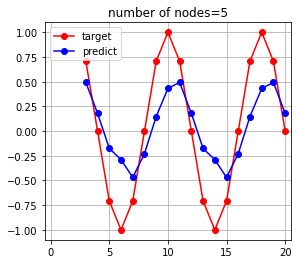

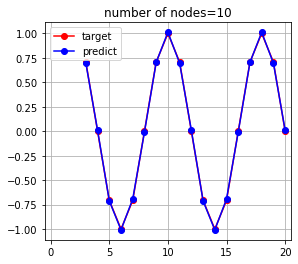

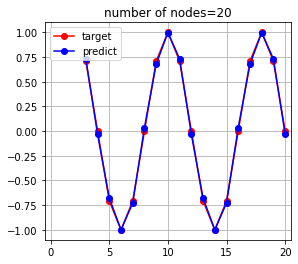

In [23]:
plt.figure(figsize=(15,4))
plt.subplot(131)
plt.plot(np.arange(3,21),y_train, 'ro-',label='target')
plt.plot(np.arange(3,21),model2.predict(X_train),'bo-',label='predict')
plt.xlim(-0.5,20.5),plt.grid()
plt.legend(),plt.title('number of nodes=5')

plt.figure(figsize=(15,4))
plt.subplot(132)
plt.plot(np.arange(3,21),y_train, 'ro-',label='target')
plt.plot(np.arange(3,21),model.predict(X_train),'bo-',label='predict')
plt.xlim(-0.5,20.5),plt.grid()
plt.legend(),plt.title('number of nodes=10')

plt.figure(figsize=(15,4))
plt.subplot(133)
plt.plot(np.arange(3,21),y_train, 'ro-',label='target')
plt.plot(np.arange(3,21),model3.predict(X_train),'bo-',label='predict')
plt.xlim(-0.5,20.5),plt.grid()
plt.legend(),plt.title('number of nodes=20')


plt.show()